# Sugestão Spotify

## Objetivos do projeto:
<p style = "text-indent:4em"> Neste projeto, decidiu-se fazer um método de sugestão de músicas do Spotify. Para isso, decidiu-se utilizar duas maneiras de separar os dados em grupos:</p>
<ol>
    <li>
        <b>Clusterização:</b> dividindo as músicas por meio da análise de algumas variáveis mais relacionadas ao som
    </li>
    <li>
        <b>Classificação:</b> classificando os dados por meio da letra da música
    </li>
</ol>
<p style = "text-indent:4em"> Feito isso, pede-se uma playlist e recomenda-se 3 músicas baseado nas etapas anteriores</p>

## 1) Clusterização:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import metrics
from scipy.spatial.distance import cdist, pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
import scipy
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import requests
import json
from Musixmatch_codigo import Musixmatch

In [2]:
def _set_page_size(page_size):

    if page_size > 100:

        page_size = 100

    elif page_size < 1:

        page_size = 1

    return page_size


In [3]:
dados = pd.read_csv('certo.csv')
x1 = dados.energy
x2 = dados.tempo
x3= dados.valence
X = np.array(list(zip(x1,x2,x3))).reshape(len(x1), 3)

<p style = "text-indent:4em"> Após a análise do resultado obtido por várias técnicas de clusterização, decidiu-se utilizar o K-means, pois foi considerado o resultado mais adequado</p>

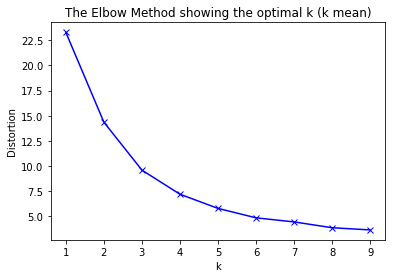

In [4]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (k mean)')
plt.show()

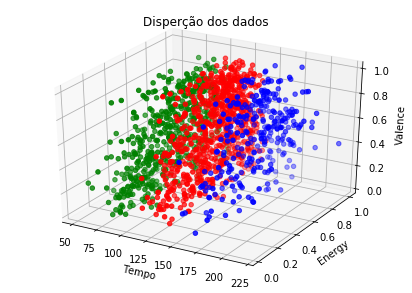

In [5]:
kmean = cluster.KMeans(n_clusters=3).fit(X)
labels_kmean = kmean.labels_
dados.loc[:,'Cluster'] = labels_kmean
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dados.tempo[dados.Cluster==0],dados.energy[dados.Cluster==0],  dados.valence[dados.Cluster==0],marker = 'o',c='blue')
ax.scatter(dados.tempo[dados.Cluster==1],dados.energy[dados.Cluster==1], dados.valence[dados.Cluster==1],marker = 'o',c='green')
ax.scatter(dados.tempo[dados.Cluster==2],dados.energy[dados.Cluster==2],dados.valence[dados.Cluster==2],marker = 'o',c='red')
ax.set_title('Disperção dos dados')
ax.set_xlabel('Tempo')
ax.set_ylabel('Energy')
ax.set_zlabel('Valence')
plt.show()

In [6]:
minemax = [{'Mínimo' : min(dados.energy[dados.Cluster==2]), 'Máximo' :  max(dados.energy[dados.Cluster==2]), 'Cluster' : 2},
           {'Mínimo' : min(dados.energy[dados.Cluster==1]), 'Máximo' :  max(dados.energy[dados.Cluster==1]), 'Cluster' : 1},
          {'Mínimo' : min(dados.energy[dados.Cluster==0]), 'Máximo' :  max(dados.energy[dados.Cluster==0]), 'Cluster' : 0}]
analise = pd.DataFrame(minemax)
analise = analise[['Mínimo','Máximo','Cluster']]
analise

,Mínimo,Máximo,Cluster
0,0.0170,0.992,2
1,0.0223,0.995,1
2,0.0259,0.997,0


In [7]:
minemax2 = [{'Mínimo' : min(dados.valence[dados.Cluster==2]), 'Máximo' :  max(dados.valence[dados.Cluster==2]), 'Cluster' : 2},
           {'Mínimo' : min(dados.valence[dados.Cluster==1]), 'Máximo' :  max(dados.valence[dados.Cluster==1]), 'Cluster' : 1},
          {'Mínimo' : min(dados.valence[dados.Cluster==0]), 'Máximo' :  max(dados.valence[dados.Cluster==0]), 'Cluster' : 0}]
analise2 = pd.DataFrame(minemax2)
analise2 = analise2[['Mínimo','Máximo','Cluster']]
analise2

,Mínimo,Máximo,Cluster
0,0.0396,0.984,2
1,0.0378,0.968,1
2,0.0334,0.969,0


In [8]:
minemax3 = [{'Mínimo' : min(dados.tempo[dados.Cluster==1]), 'Máximo' :  max(dados.tempo[dados.Cluster==1]), 'Cluster' : 1},
            {'Mínimo' : min(dados.tempo[dados.Cluster==2]), 'Máximo' :  max(dados.tempo[dados.Cluster==2]), 'Cluster' : 2},
          {'Mínimo' : min(dados.tempo[dados.Cluster==0]), 'Máximo' :  max(dados.tempo[dados.Cluster==0]), 'Cluster' : 0}]
analise3 = pd.DataFrame(minemax3)
analise3 = analise3[['Mínimo','Máximo','Cluster']]
analise3

,Mínimo,Máximo,Cluster
0,51.952,108.665,1
1,108.700,146.367,2
2,146.776,217.897,0


<p style = "text-indent:4em"> A partir das tabelas acima, percebe-se que a variável que está controlando a divisão dos clusters é <b><em>tempo</em></b>. Estabilizando-a, pode-se obter os resultados a seguir.</p>

In [11]:
dados_0= dados[dados.Cluster==0]
x4 = dados_0.energy
x5 = dados_0.valence
X2 = np.array(list(zip(x4,x5))).reshape(len(x4), 2)

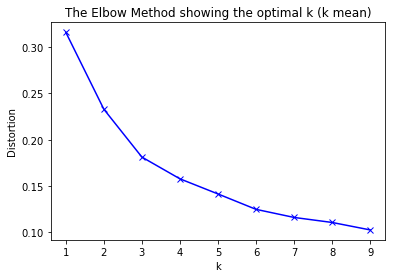

In [12]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(X2)
    distortions.append(sum(np.min(cdist(X2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X2.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (k mean)')
plt.show()

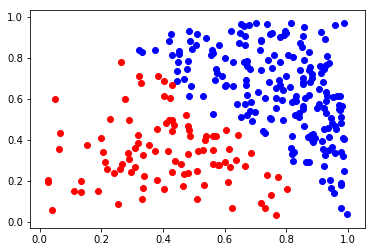

In [13]:
kmean = cluster.KMeans(n_clusters=2).fit(X2)
labels_kmean2 = kmean.labels_
dados.loc[dados.Cluster==0,'Clusterfinal'] = labels_kmean2
plt.scatter(dados.energy[dados.Clusterfinal==0],dados.valence[dados.Clusterfinal==0],marker = 'o', c = 'blue')
plt.scatter(dados.energy[dados.Clusterfinal==1],dados.valence[dados.Clusterfinal==1],marker = 'o', c = 'red')
plt.show()     


In [14]:
dados_1= dados[dados.Cluster==1]
x6 = dados_1.energy
x7 = dados_1.valence
X3 = np.array(list(zip(x6,x7))).reshape(len(x6), 2)

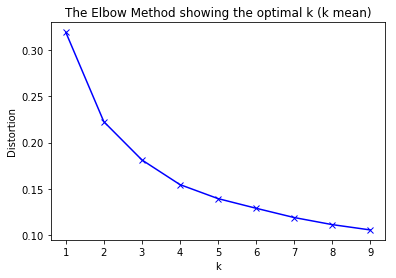

In [15]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(X3)
    distortions.append(sum(np.min(cdist(X3, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X3.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (k mean)')
plt.show()

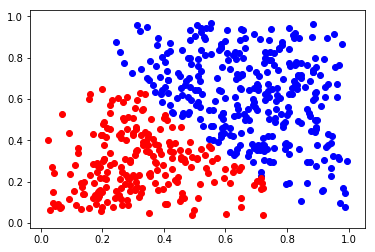

In [16]:
kmean = cluster.KMeans(n_clusters=2).fit(X3)
labels_kmean3 = kmean.labels_
dados.loc[dados.Cluster==1,'Clusterfinal'] = labels_kmean3+2
plt.scatter(dados.energy[dados.Clusterfinal==2],dados.valence[dados.Clusterfinal==2],marker = 'o', c = 'blue')
plt.scatter(dados.energy[dados.Clusterfinal==3],dados.valence[dados.Clusterfinal==3],marker = 'o', c = 'red')
plt.show()       

In [17]:
dados_2= dados[dados.Cluster==2]
x8 = dados_2.energy
x9 = dados_2.valence
X4 = np.array(list(zip(x8,x9))).reshape(len(x8), 2)

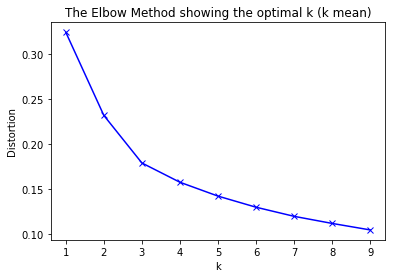

In [18]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(X4)
    distortions.append(sum(np.min(cdist(X4, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X4.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (k mean)')
plt.show()

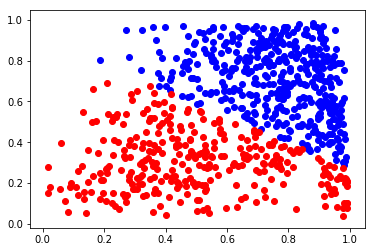

In [19]:
kmean = cluster.KMeans(n_clusters=2).fit(X4)
labels_kmean = kmean.labels_
dados.loc[dados.Cluster==2,'Clusterfinal'] = labels_kmean+4
plt.scatter(dados.energy[dados.Clusterfinal==4],dados.valence[dados.Clusterfinal==4],marker = 'o', c = 'blue')
plt.scatter(dados.energy[dados.Clusterfinal==5],dados.valence[dados.Clusterfinal==5],marker = 'o', c = 'red')
plt.show()    

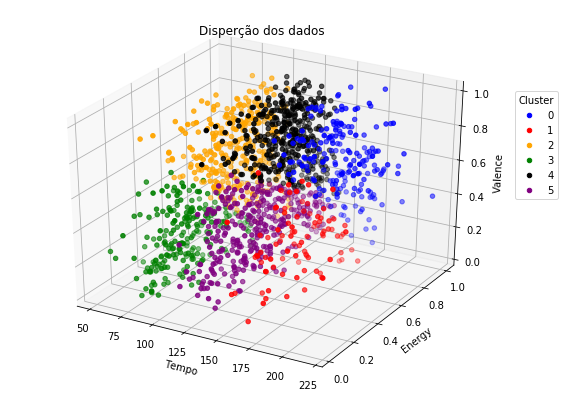

In [20]:

fig = plt.figure(figsize=[9,7])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dados.tempo[dados.Clusterfinal==0],dados.energy[dados.Clusterfinal==0],  dados.valence[dados.Clusterfinal==0],marker = 'o',c='blue', label='0')
ax.scatter(dados.tempo[dados.Clusterfinal==1],dados.energy[dados.Clusterfinal==1],  dados.valence[dados.Clusterfinal==1],marker = 'o',c='red', label='1')
ax.scatter(dados.tempo[dados.Clusterfinal==2],dados.energy[dados.Clusterfinal==2],  dados.valence[dados.Clusterfinal==2],marker = 'o',c='orange', label='2')
ax.scatter(dados.tempo[dados.Clusterfinal==3],dados.energy[dados.Clusterfinal==3],  dados.valence[dados.Clusterfinal==3],marker = 'o',c='green', label='3')
ax.scatter(dados.tempo[dados.Clusterfinal==4],dados.energy[dados.Clusterfinal==4],  dados.valence[dados.Clusterfinal==4],marker = 'o',c='black', label='4')
ax.scatter(dados.tempo[dados.Clusterfinal==5],dados.energy[dados.Clusterfinal==5],  dados.valence[dados.Clusterfinal==5],marker = 'o',c='purple', label='5')
ax.set_title('Disperção dos dados')
ax.set_xlabel('Tempo')
ax.set_ylabel('Energy')
ax.set_zlabel('Valence')
plt.legend(bbox_to_anchor=(1.1, 0.8), ncol=1, title='Cluster')
plt.show()

## 3) Recomendação:

In [3]:
def corta_link(url):
    barras=[]
    user=[]
    playlist=[]
    for x in url:
        if x == '/':
            barras.append('/')
        if len(barras)==4 and x!= "/":
            user.append(x)
        if len(barras)==6 and x!= "/":
            playlist.append(x)
    usuario = user[0]
    for y in range(1,len(user)):
        usuario+=user[y]
    lista = playlist[0]
    for z in range(1,len(playlist)):
        lista+=playlist[z]
    return usuario, lista
    

In [4]:
def pega_playlist(url):
    userid = corta_link(url)[0]
    playlistid = corta_link(url)[1]
    sp = spotipy.Spotify() 
    cid ="34bdc4cd8c0e4d4fa3d9f8928bf8eb4a" 
    secret = "3b9465aab3bb46e89d03211376666665" 
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
    sp.trace=False 
    playlist = sp.user_playlist(userid, playlistid ) 
    songs = playlist["tracks"]["items"] 
    ids = [] 
    for i in range(len(songs)): 
        ids.append(songs[i]["track"]["id"]) 
    features = sp.audio_features(ids) 
    df2 = pd.DataFrame(features)
    # Limpando Dataframe
    df_new2 =df2
    lista_variaveis=['energy','tempo','valence','id']
    for i in df_new2:
        if i in lista_variaveis:
            continue
        else:
            df_new2=df_new2.drop(i, axis=1)
    lista=[]
    for i in df_new2:
            n=0
            for c in df_new2[i]:

                if c==0:
                    df_new2=df_new2.drop(n)
                    lista.append(n)
            n=n+1
    df_new=df_new2.drop_duplicates()
    df_new = colunas_novas(df_new,sp)
    df_new = df_new[['musica','artista','id','energy','tempo','valence']]
    return df_new

In [5]:
def nome_artista(track):
    artista = track['album']['artists'][0]['name']
    return artista
def nome_musica(track):
    musica = track['name']
    return musica

In [6]:
def colunas_novas(dados,sp):
    artistas =[]
    musicas = []
    for x in dados.id:
        track = sp.track(x)
        artistas.append(nome_artista(track))
        musicas.append(nome_musica(track))
    dados.loc[:,'musica'] = musicas
    dados.loc[:,'artista'] = artistas
    return dados

In [7]:
def encontra_letra(musica, artista):
    mxm = Musixmatch('cd599544c0a9ba5d08ad129d3efb2684')
    info = mxm.track_search(musica, artista)
    if info['message']['header']['status_code'] == 404 or info['message']['header']['available']==0:
        letrafinal = np.NaN
    else:   
        comletra = mxm.track_lyrics_get(info['message']['body']['track_list'][0]['track']['track_id'])
        letra = comletra['message']['body']['lyrics']['lyrics_body']
        if len(letra) == 0:
            letrafinal = np.NaN
        else:
            letrafinal=letra[0]
            for i in range(2,len(letra)):   
                if letra[i]== letra[i-1] and letra[i] == '*':
                    break
                letrafinal+=letra[i-1]
    return letrafinal

def coluna_letra(playlist):
    letras=[]
    for i in range(len(playlist.artista)):
        letra = encontra_letra(playlist.musica[i],playlist.artista[i])
        letras.append(letra)
    playlist.loc[:,"Letra"]= letras
    return playlist
def cria_dataframe(url):
    dados = pega_playlist(url)
    dados = coluna_letra(dados)
    dados = dados.dropna(subset = ['Letra'])
    return dados
    


In [8]:
url = 'https://open.spotify.com/user/annabcmauro/playlist/1igIw8wIDwnye99LiSn76z?si=S_Ny67z0QHOwpHAH6IAxkQ'

In [9]:
dados = cria_dataframe(url)

In [22]:
dados

,musica,artista,id,energy,tempo,valence,Letra
0,Freedom! '90,George Michael,1SKApv6ZfJ9bkUxeRObJEF,0.873,91.770,0.818,I won't let you down\nI will not give you up\n...
1,Faith - Remastered,George Michael,0HEmnAUT8PHznIAAmVXqFJ,0.480,95.846,0.607,"Well, I guess it would be nice\nIf I could tou..."
2,Careless Whisper,George Michael,4jDmJ51x1o9NZB5Nxxc7gY,0.629,153.119,0.786,I feel so unsure\nAs I take your hand and lead...
3,A Thousand Years,Christina Perri,6lanRgr6wXibZr8KgzXxBl,0.407,139.028,0.161,Heart beats fast\nColors and promises\nHow to ...
4,All You Need Is Love - Remastered,The Beatles,2u8yti7fZtXMbwqex7M0DZ,0.463,103.103,0.627,"Love, love, love, love, love, love, love, love..."
5,Everybody (Backstreet's Back) - Extended Version,Backstreet Boys,5WTxbyWTpoqhdxEN2szOnl,0.811,108.054,0.509,Everybody\nRock your body\nEverybody\nRock you...
6,Apologize,OneRepublic,6fOPuabPdAJ0HgqJFcDGb1,0.740,118.008,0.502,I'm holding on your rope\nGot me ten feet off ...
7,Numb,Linkin Park,2nLtzopw4rPReszdYBJU6h,0.863,110.018,0.243,I'm tired of being what you want me to be\nFee...
8,Californication,Red Hot Chili Peppers,48UPSzbZjgc449aqz8bxox,0.767,96.483,0.328,Psychic spies from China\nTry to steal your mi...
10,Little Things,One Direction,7kSLdGdXLey7pzLsWpdg1h,0.222,110.095,0.556,Your hand fits in mine like it's made just for...


In [27]:
a = dados.artista.value_counts().idxmax()
vezes = dados.artista.value_counts().max()
relevancia = {a:vezes}
print(relevancia)

{'George Michael': 3}
